In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from rdfrun import *
from benchmark_queries import *
import time
%matplotlib inline

In [2]:
init = False
NUM_RUNS = 100
TIME_BTWN = .5

In [3]:
hod = HodDB(init=init)
rdf3x = RDF3X(init=init)
rdflib = RDFlib(init=init)
fuseki = Fuseki(init=init)
allegro = AlegroGraph(init=init)
blaze = BlazeGraph(init=init)

In [82]:
def do_runs(db, query, num=NUM_RUNS):
    runs = []
    for i in range(num):
        t1 = time.time()*1000
        resp = db.query(query)
        t2 = time.time()*1000
        if resp is None: break
        runs.append(t2-t1)
        time.sleep(TIME_BTWN)
    return runs    
def overlap_hist(df):
    plt.clf()
    bins = pd.np.linspace(0, df.max().max(), 100)
    for col in df.columns:
        plt.hist(df[col], alpha=0.5, label=col)
    plt.legend(loc='upper right')
    plt.show()
def overlap_cdf(df,title=''):
    plt.clf()
    plt.figure()
    for col in df.columns:
        #plt.hist(df[col], alpha=0.5, label=col)
        ax = df[col].hist(cumulative=True, normed=1, bins=100, histtype='step',label=col)
        #x.set_label(col)
    plt.legend(loc='lower right')
    ax.get_figure().set_dpi(200)
    plt.xlabel("Latency (ms)")
    plt.ylabel("Portion of requests")
    plt.title(title)

In [5]:
# VAV Enum
q = benchqueries['VAVEnum']
print("Run Hod")
hod_data= do_runs(hod, q['hod'])
print("Run RDF3X")
rdf3x_data = do_runs(rdf3x, q['sparql'])
print("Run RDFLib")
rdflib_data = do_runs(rdflib, q['sparql'])
print("Run Fuseki")
fuseki_data = do_runs(fuseki, q['sparql'])
print("Run Allegro")
allegro_data = do_runs(allegro, q['sparql'])
print("Run Blaze")
blaze_data = do_runs(blaze, q['sparql'])

Run Hod
Run RDF3X
Run RDFLib
Run Fuseki
Run Allegro
Run Blaze


In [15]:
vavdf = pd.DataFrame.from_records({'hod':hod_data,'rdf3x':rdf3x_data, 'rdflib':rdflib_data,'allegro':allegro_data,'blaze':blaze_data,'fuseki':fuseki_data})
vavdf.describe()

,allegro,blaze,fuseki,hod,rdf3x,rdflib
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,23.060842,24.053855,17.650510,6.277954,7.982068,33.023059
std,4.844468,5.212758,14.619682,1.468641,1.401689,7.240451
min,16.797363,17.630371,12.019287,5.011963,6.486328,27.473389
25%,18.630920,19.805725,14.335571,5.244141,6.980225,28.480286
50%,23.154053,23.100952,15.721924,5.857300,7.357056,29.744995
75%,25.996887,27.678650,17.797302,7.028809,8.530945,36.448303
max,41.171875,41.475830,157.258301,14.690674,14.865723,71.825439


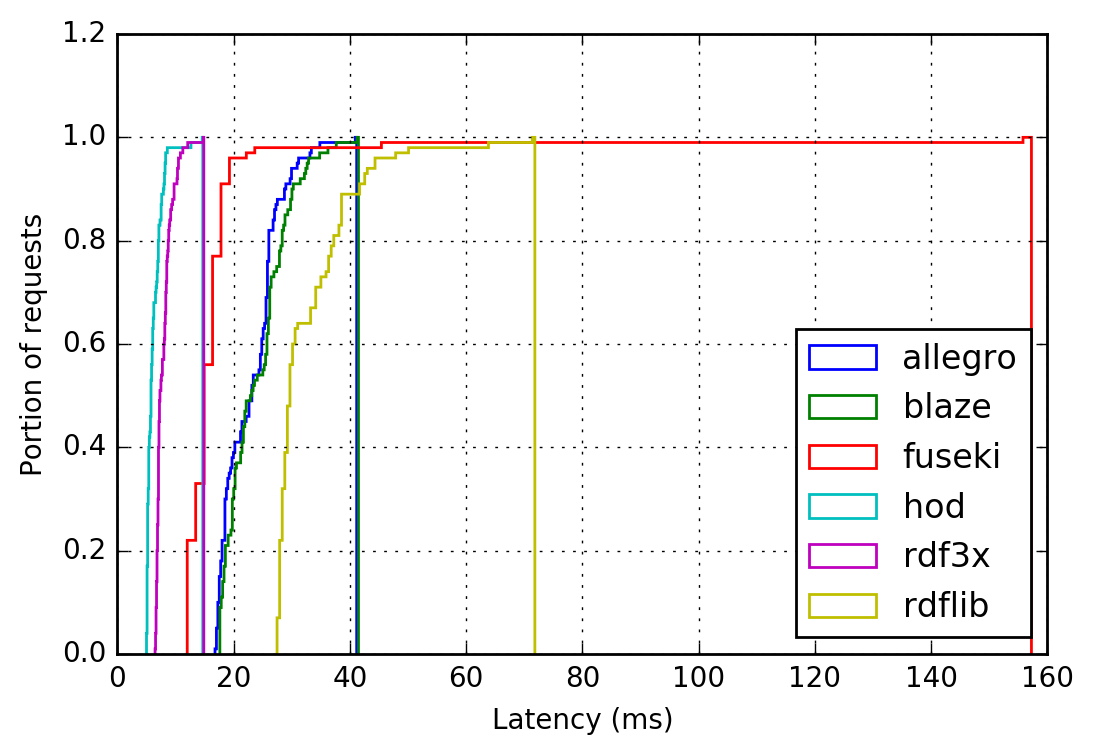

In [81]:
fig = overlap_cdf(vavdf)

In [59]:
3

3

In [8]:
# Temp Sensor
q = benchqueries['TempSensor']
print("Run Hod")
hod_data= do_runs(hod, q['hod'])
print("Run RDF3X")
rdf3x_data = do_runs(rdf3x, q['sparql'])
print("Run RDFLib")
rdflib_data = do_runs(rdflib, q['sparql'])
print("Run Fuseki")
fuseki_data = do_runs(fuseki, q['sparql'])
print("Run Allegro")
allegro_data = do_runs(allegro, q['sparql'])
print("Run Blaze")
blaze_data = do_runs(blaze, q['sparql'])

Run Hod


KeyboardInterrupt: 

In [ ]:
vavdf = pd.DataFrame.from_records({'hod':hod_data,'rdf3x':rdf3x_data, 'rdflib':rdflib_data,'allegro':allegro_data,'blaze':blaze_data,'fuseki':fuseki_data})